<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

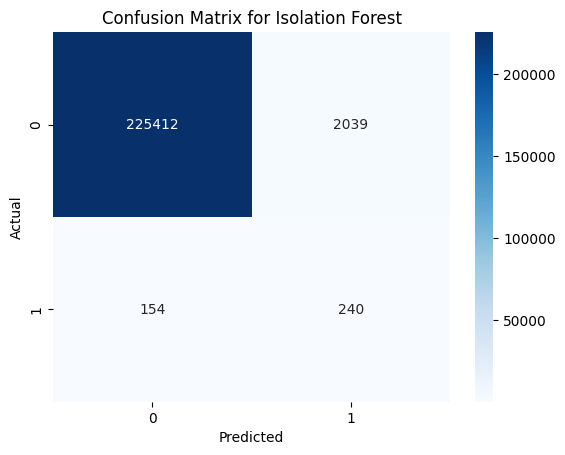

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    227451
           1       0.03      0.86      0.06       394

    accuracy                           0.95    227845
   macro avg       0.51      0.91      0.52    227845
weighted avg       1.00      0.95      0.97    227845



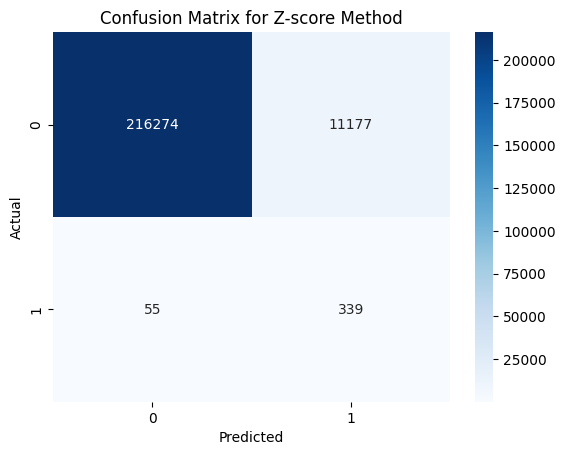

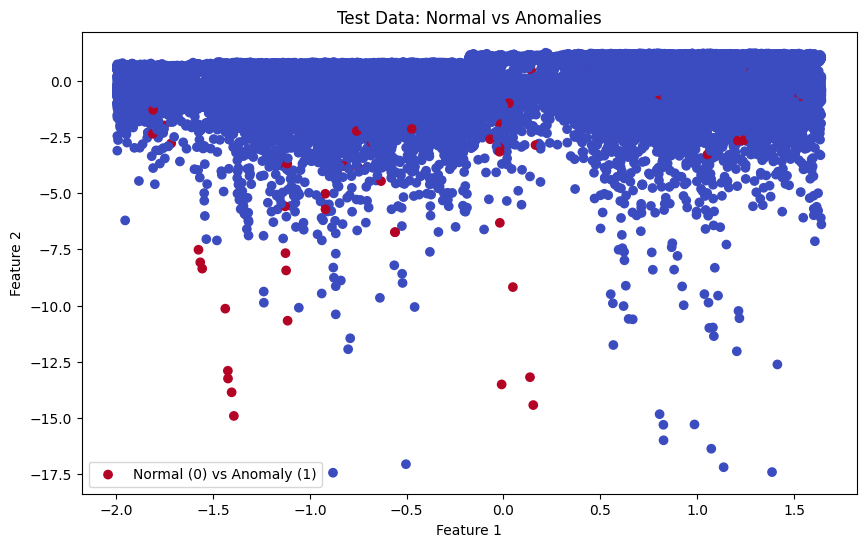

Total anomalies detected using Isolation Forest: 2279
Total anomalies detected using Z-score: 11516


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/macbookair/Desktop/data_mining2/creditcard.csv')  

print(data.info())
print(data.describe())

print(data.isnull().sum())

X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_train_pred = iso_forest.fit_predict(X_train)

y_train_pred = np.where(y_train_pred == -1, 1, 0)  

print(classification_report(y_train, y_train_pred))
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

threshold = 4
z_scores_train = np.abs((X_train - X_train.mean(axis=0)) / X_train.std(axis=0))
y_train_z = (z_scores_train > threshold).any(axis=1).astype(int)


print(classification_report(y_train, y_train_z))
conf_matrix_z = confusion_matrix(y_train, y_train_z)
sns.heatmap(conf_matrix_z, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Z-score Method')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='Normal (0) vs Anomaly (1)')
plt.title('Test Data: Normal vs Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f'Total anomalies detected using Isolation Forest: {np.sum(y_train_pred)}')
print(f'Total anomalies detected using Z-score: {np.sum(y_train_z)}') 